# Numpy


In [164]:
import numpy as np
import pandas as pd

from scipy import stats

import statsmodels.api as sm

In [165]:
# np.random.seed(1234)
# panda random uses numpy for generator, so the seed would be the same
# if reset numpy seed, need to reload package/reset kernal

In [166]:
animal_ls = ['cat', 'dog', 'fish','bird', 'moose', 'snake', 'axlotl']

In [167]:
result_ls = []
for animal in animal_ls:
    result_ls.append(animal + 'is an animal')

In [168]:
result_ls

['catis an animal',
 'dogis an animal',
 'fishis an animal',
 'birdis an animal',
 'mooseis an animal',
 'snakeis an animal',
 'axlotlis an animal']

In [169]:
#list comprehension
result_ls = [animal + 'is an animal' for animal in animal_ls]

#You need to run blocks in the right order to have the right results
#Use notebook to play around/exploring, after certain, use scripts

In [170]:
a = np.array([[1,2,3,4],
             [5,6,7,8]])


In [171]:
a

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [172]:
a.shape


(2, 4)

In [173]:
a.dtype

dtype('int64')

In [174]:
a.astype(str)

array([['1', '2', '3', '4'],
       ['5', '6', '7', '8']], dtype='<U21')

In [175]:
# 2 dimentional array use row and column
a[1,:-1]

array([5, 6, 7])

In [176]:
a[:,3]

array([4, 8])

In [177]:
a = np.arange(3,100,2)

In [178]:
# Both 0 and 1 are included compared to arange
b = np.linspace(0,1,1001)

In [179]:
# (10,4) is the shape row x column
c = np.random.standard_normal((10,4))

In [180]:
# np.float63 just mean it is more accurate, new feature of python?
c.mean()

np.float64(0.10406645907648612)

In [181]:
c.std()

np.float64(0.880291109755453)

In [182]:
a = np.random.choice([1,2,3],(7,4))
b = np.arange(7)

In [183]:
a

array([[2, 2, 1, 1],
       [3, 3, 3, 2],
       [1, 2, 1, 2],
       [2, 2, 1, 1],
       [2, 3, 2, 3],
       [3, 3, 2, 3],
       [2, 1, 3, 2]])

In [184]:
a+a

array([[4, 4, 2, 2],
       [6, 6, 6, 4],
       [2, 4, 2, 4],
       [4, 4, 2, 2],
       [4, 6, 4, 6],
       [6, 6, 4, 6],
       [4, 2, 6, 4]])

In [185]:
b=b.reshape((7,1)) #reshape b to 2 dimentional 7row x 1 col

In [186]:
a+b
# Numpy *broadcast* arithmetic between arrays if they have campatible shapes
# Will break if they are not campatible

array([[2, 2, 1, 1],
       [4, 4, 4, 3],
       [3, 4, 3, 4],
       [5, 5, 4, 4],
       [6, 7, 6, 7],
       [8, 8, 7, 8],
       [8, 7, 9, 8]])

# Pandas

In [187]:
toy_df = pd.DataFrame(data=[['cat', 1],
                            ['dog', 3],
                            ['fish',4],
                            ['cow', 20]],
                        columns=['animals','weight'],
                        index=['a', 'b', 'c', 'd'])  

In [188]:
toy_df

,animals,weight
a,cat,1
b,dog,3
c,fish,4
d,cow,20


In [189]:
toy_df.info()
# Dtype object usually mean string

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   animals  4 non-null      object
 1   weight   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 96.0+ bytes


In [190]:
toy_df["animals"]

a     cat
b     dog
c    fish
d     cow
Name: animals, dtype: object

In [191]:

toy_df['age'] = [5.0, 3.0, 1.0, 10.0] # add a column

In [192]:
toy_df.loc[['b', 'd'], ['animals', 'age']]

,animals,age
b,dog,3.0
d,cow,10.0


In [193]:
toy_df['animals'] == 'dog'

a    False
b     True
c    False
d    False
Name: animals, dtype: bool

In [194]:
toy_df.loc[toy_df['animals']=='dog', :]
# .loc assume df is 2 dimentional

,animals,weight,age
b,dog,3,3.0


In [195]:
toy_df.loc[(toy_df['animals']=='dog') | (toy_df['animals']=='cat')]

,animals,weight,age
a,cat,1,5.0
b,dog,3,3.0


In [196]:
toy_df.loc[(toy_df['animals']=='dog') | (toy_df['age'] >= 3)]

,animals,weight,age
a,cat,1,5.0
b,dog,3,3.0
d,cow,20,10.0


In [197]:
iris_df = pd.read_csv('iris_missing_values.csv')
# iris_df = pd.read_csv('iris_missing_values.csv', index_col = 0)

In [198]:
iris_df

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,flower_0,5.1,3.5,1.4,0.2,setosa
1,flower_1,4.9,3.0,1.4,0.2,setosa
2,flower_2,4.7,3.2,1.3,0.2,setosa
3,flower_3,4.6,3.1,1.5,0.2,setosa
4,flower_4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,flower_145,6.7,3.0,5.2,2.3,virginica
146,flower_146,6.3,2.5,5.0,1.9,virginica
147,flower_147,6.5,3.0,5.2,2.0,virginica
148,flower_148,6.2,3.4,5.4,2.3,virginica


In [199]:
iris_df = iris_df.set_index("Unnamed: 0")
# or iris_df.set_index("Unnamed: 0", inplace = True)
# This will keep the change in the df and is considered better because repeted run can break

In [200]:
iris_df["type"].value_counts(dropna=False)

type
setosa        46
versicolor    45
virginica     44
NaN           15
Name: count, dtype: int64

In [201]:
setosa_df = iris_df.loc[iris_df['type']=='setosa',]
virginica_df = iris_df.loc[iris_df['type']=='virginica',]
versicolor_df = iris_df.loc[iris_df['type']=='versicolor',]

In [202]:

type_dfs = []
for type in ['setosa', 'versicolor', 'virginica']:
    type_dfs.append(iris_df.loc[iris_df['type']==type,:]) 
    #.loc difference of iris_df[iris_df['type']=='type]?

In [203]:
type_dfs[0]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
Unnamed: 0,,,,,
flower_0,5.1,3.5,1.4,0.2,setosa
flower_1,4.9,3.0,1.4,0.2,setosa
flower_2,4.7,3.2,1.3,0.2,setosa
flower_3,4.6,3.1,1.5,0.2,setosa
flower_4,5.0,3.6,1.4,0.2,setosa
flower_5,5.4,3.9,1.7,0.4,setosa
flower_6,4.6,3.4,1.4,0.3,setosa
flower_7,5.0,3.4,1.5,0.2,setosa
flower_8,4.4,2.9,1.4,0.2,setosa


In [204]:
type_dfs1={}
for type in ["setosa","versicolor","versicolor"]:
    type_dfs1[type]=iris_df.loc[iris_df["type"]==type,:]
type_dfs1['setosa']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
Unnamed: 0,,,,,
flower_0,5.1,3.5,1.4,0.2,setosa
flower_1,4.9,3.0,1.4,0.2,setosa
flower_2,4.7,3.2,1.3,0.2,setosa
flower_3,4.6,3.1,1.5,0.2,setosa
flower_4,5.0,3.6,1.4,0.2,setosa
flower_5,5.4,3.9,1.7,0.4,setosa
flower_6,4.6,3.4,1.4,0.3,setosa
flower_7,5.0,3.4,1.5,0.2,setosa
flower_8,4.4,2.9,1.4,0.2,setosa


In [205]:
iris_df.iloc[:10,:2]

,sepal length (cm),sepal width (cm)
Unnamed: 0,,
flower_0,5.1,3.5
flower_1,4.9,3.0
flower_2,4.7,3.2
flower_3,4.6,3.1
flower_4,5.0,3.6
flower_5,5.4,3.9
flower_6,4.6,3.4
flower_7,5.0,3.4
flower_8,4.4,2.9


In [206]:
iris_df['sum_length'] = iris_df['petal length (cm)'] + iris_df['sepal length (cm)']

In [207]:
iris_df.sample(10,replace=True) # random selection for bootstraping?

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type,sum_length
Unnamed: 0,,,,,,
flower_123,6.3,2.7,4.9,1.8,NaN,11.2
flower_61,5.9,3.0,4.2,1.5,versicolor,10.1
flower_76,6.8,2.8,4.8,1.4,versicolor,11.6
flower_87,6.3,2.3,4.4,1.3,versicolor,10.7
flower_139,6.9,3.1,5.4,2.1,virginica,12.3
flower_11,4.8,3.4,1.6,0.2,setosa,6.4
flower_97,6.2,2.9,4.3,1.3,versicolor,10.5
flower_128,6.4,2.8,5.6,2.1,virginica,12.0
flower_50,7.0,3.2,4.7,1.4,versicolor,11.7


# Statistics with scipy and statsmodels

In [208]:
ttest_result = stats.ttest_ind(setosa_df['sepal length (cm)'],
                               virginica_df['sepal length (cm)'],
                               equal_var=False)

In [209]:
ttest_result

TtestResult(statistic=np.float64(-14.468170059962942), pvalue=np.float64(1.7606944675930888e-22), df=np.float64(68.2858924413873))

In [210]:
stats.pearsonr(setosa_df['petal length (cm)'], setosa_df['petal width (cm)'])

PearsonRResult(statistic=np.float64(0.37345181112157516), pvalue=np.float64(0.010576167315504412))

In [211]:
from  matplotlib import pyplot as plt

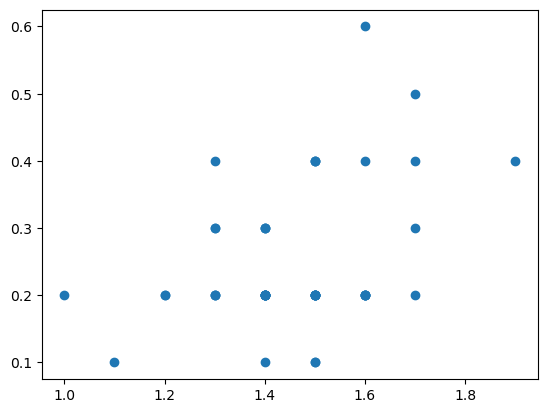

In [212]:
plt.scatter(setosa_df['petal length (cm)'], setosa_df['petal width (cm)'])

# Statsmodels

In [213]:
df = pd.read_csv("california_housing.tsv", sep='\t', index_col=0) # separated by tab

In [214]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
district_0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
district_1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
district_2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
district_3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
district_4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
district_20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
district_20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
district_20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
district_20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [215]:
california_ols = sm.OLS(df['MedHouseVal'],sm.add_constant(df.loc[:,['MedInc']]))
# sm.add_constant is equvalent to add a column of constant/"1"
# to allow a intercept term?

In [216]:
california_ols_results = california_ols.fit()

In [217]:
print(california_ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 1.856e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        13:38:35   Log-Likelihood:                -25623.
No. Observations:               20640   AIC:                         5.125e+04
Df Residuals:                   20638   BIC:                         5.127e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4509      0.013     34.082      0.0

# Afternoon

In [218]:
import numpy as np
import pandas as pd

In [219]:
rank = pd.Series(['ace', 2,3,4,5,6,7,8,9,10,'jakc','queen','king'])
suit = pd.Series(['heart', 'spades', 'clubs', 'diamonds'])

In [220]:
deck = pd.merge(rank.rename('rank').to_frame(),suit.rename('suit').to_frame(), how='cross')
deck

,rank,suit
0,ace,heart
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,heart
5,2,spades
6,2,clubs
7,2,diamonds
8,3,heart
9,3,spades


In [230]:
def get_new_deck():
    rank = pd.Series(['ace', 2,3,4,5,6,7,8,9,10,'jack','queen','king'])
    suit = pd.Series(['heart', 'spades', 'clubs', 'diamonds'])
    deck = pd.merge(rank.rename('rank').to_frame(),suit.rename('suit').to_frame(), how='cross')
    return deck # end of function, any object don't get return will be deleted

In [231]:
deck = get_new_deck()
hand = deck.sample(2, replace = False)
hand

,rank,suit
47,queen,diamonds
35,9,diamonds


In [232]:
deck.drop(hand.index, axis = 'rows') #axis = 'rows' not necessary

,rank,suit
0,ace,heart
1,ace,spades
2,ace,clubs
3,ace,diamonds
4,2,heart
5,2,spades
6,2,clubs
7,2,diamonds
8,3,heart
9,3,spades


In [233]:
def draw_card(n,deck):
    drawn = deck.sample(n, replace = False)
    deck = deck.drop(drawn.index)
    return drawn, deck

In [259]:
hand_size = 5
while len(deck) > hand_size:
    hand, deck = draw_card(hand_size, deck) # two returned factors from the function
    print(len(deck))

In [258]:
deck

,rank,suit
20,6,heart
29,8,spades


In [236]:
deck.set_index(['rank','suit'])

,
rank,suit
6,heart
8,spades


In [289]:
def score_hand(hand):
    score = 0
    aces = hand.loc[hand['rank'] == 'ace']
    rest = hand.loc[hand['rank'] != 'ace']

    for _i, card in rest.iterrows():
        rank = card['rank']
        if isinstance(rank, int):  # 更安全的类型检查
            score += rank
        elif isinstance(rank, str):
            score += 10


    for _i, card in aces.iterrows():
        score += 11 if score + 11 <= 21 else 1

    return score


In [290]:
hand['rank']

48    king
20       6
24       7
14       4
1      ace
Name: rank, dtype: object

In [291]:
score_hand(hand)

28

In [276]:
deck = get_new_deck()
running_score = 0
while len(deck) > hand_size:
    hand, deck = draw_card(hand_size, deck)
    if 'ace' in hand['rank']:
        continue
    hand_score = score_hand(hand)
    running_score += hand_score


In [306]:
import matplotlib.pyplot as plt  # 正确！plt 指向 pyplot 模块

In [310]:
def play_hand(deck):
    hand, deck = draw_card(2, deck)
    score = score_hand(hand)
    while score <= 15:
        drawn_card, deck = draw_card(1,deck)
        hand = pd.concat([hand,drawn_card])
        score = score_hand(hand)
     
    if score >21:
        score = 0
    return score

(array([ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  9., 28.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

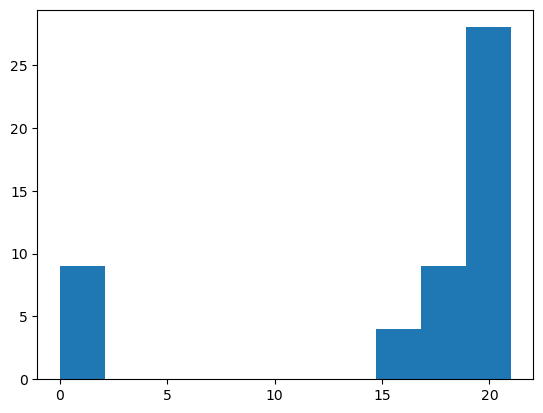

In [311]:
num_trials = 50
trial_results = []
for i in range(num_trials):
    deck = get_new_deck()
    score = play_hand(deck)
    trial_results.append(score)

plt.hist(trial_results)
